# Análise dos Datasets

Esse notebook contém análises sobre os datasets para garantir uma melhor validade das conclusões do estudo principal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from utils import concat_dfs, substituir_cod_municipio


### Importando datasets files

In [2]:
data_type = "files"  # files ou api

auxilio_emergencial = concat_dfs(
    f"parsed_data/auxilio_emergencial/{data_type}"
)

bolsa_familia = concat_dfs(f"parsed_data/bolsa_familia/{data_type}")

suicidios = pd.read_csv("parsed_data/suicidios/suicidios.csv")
suicidios["date"] = pd.to_datetime(suicidios["date"])
suicidios["municipio_ibge"] = suicidios["municipio_ibge"].astype(float)

populacao = pd.read_csv('parsed_data/municipios/populacao.csv')

### Bolsa Família

In [3]:
bolsa_familia.head(5)

,municipio_siafi,contagem,soma,date
0,105,3336.0,664577.0,2020-11-01
1,107,10146.0,3369814.0,2020-11-01
2,109,3192.0,1092459.0,2020-11-01
3,113,4887.0,1464602.0,2020-11-01
4,139,25115.0,5789345.0,2020-11-01


#### Colunas

In [4]:
n_colunas = bolsa_familia.shape[1]
colunas = bolsa_familia.columns

print("Colunas:", n_colunas)
print(*colunas, sep=" | ")

Colunas: 4
municipio_siafi | contagem | soma | date


#### Quantidade de municípios

In [5]:
n_municipios = len(bolsa_familia['municipio_siafi'].unique())
print('Quantidade municípios:', n_municipios)

Quantidade municípios: 5570


#### Meses

In [6]:
start_date = bolsa_familia['date'].min()
end_date = bolsa_familia['date'].max()

n_meses = (end_date.to_period("M") - start_date.to_period('M')).n + 1

print("Data inicial:", start_date)
print("Data final:", end_date)
print("Quantidade meses:", n_meses)

Data inicial: 2019-08-01 00:00:00
Data final: 2021-10-01 00:00:00
Quantidade meses: 27


#### Tamanho da amostra

In [7]:
amostra_size = bolsa_familia.shape[0]
print("Tamanho da amostra:", amostra_size)
print("Meses x Qtd. Municípios:", n_meses * n_municipios)

Tamanho da amostra: 150390
Meses x Qtd. Municípios: 150390


Ou seja, todos os municípios receberam o bolsa família durante todo o período.

#### Dados faltantes e outliers

In [8]:
bolsa_familia.isna().sum()

municipio_siafi    0
contagem           0
soma               0
date               0
dtype: int64

<AxesSubplot: xlabel='contagem'>

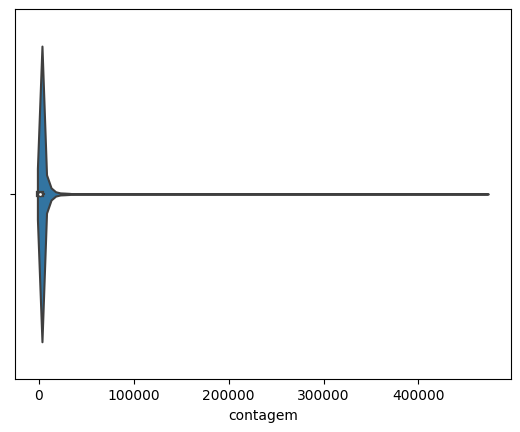

In [9]:
sns.violinplot(data=bolsa_familia, x='contagem')

<AxesSubplot: xlabel='soma'>

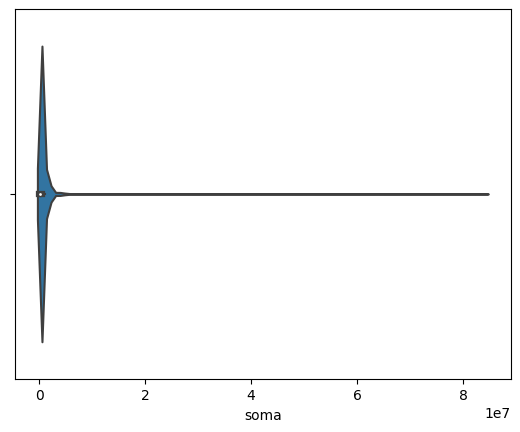

In [10]:
sns.violinplot(data=bolsa_familia, x='soma')

#### Checagem de-para municípios

In [11]:
len(bolsa_familia['municipio_siafi'].unique())

5570

In [12]:
bolsa_familia = substituir_cod_municipio(bolsa_familia)

In [13]:
len(bolsa_familia['municipio_ibge'].unique())

5570

### Auxílio Emergencial

In [14]:
auxilio_emergencial.head()

,municipio_ibge,soma,contagem,date
0,1100106.0,1200.0,1.0,2022-05-01
1,1100122.0,2400.0,1.0,2022-05-01
2,1100130.0,1800.0,1.0,2022-05-01
3,1100155.0,2400.0,1.0,2022-05-01
4,1100205.0,20075.0,9.0,2022-05-01


In [15]:
n_colunas = auxilio_emergencial.shape[1]
colunas = auxilio_emergencial.columns

print("Colunas:", n_colunas)
print(*colunas, sep=" | ")

Colunas: 4
municipio_ibge | soma | contagem | date


In [16]:
n_municipios = len(auxilio_emergencial['municipio_ibge'].unique())
print('Quantidade municípios:', n_municipios)

Quantidade municípios: 5572


A principio 2 municípios a mais que dados do bolsa família. Entretanto, note que se trata do valor zero e do valor vazio, logo ambas as amostras possuem a mesma quantidade de municípios e não precisamos nos preocupar:

In [17]:
municipios_ae = set(auxilio_emergencial['municipio_ibge'].unique())
municipios_bf = set(bolsa_familia['municipio_ibge'].unique())

municipios_ae.difference(municipios_bf)

{0.0, nan}

#### Meses

In [18]:
start_date = auxilio_emergencial['date'].min()
end_date = auxilio_emergencial['date'].max()

n_meses = (end_date.to_period("M") - start_date.to_period('M')).n + 1

print('Data inicial:', start_date)
print('Data final:', end_date)
print("Quantidade meses:", n_meses)

Data inicial: 2020-04-01 00:00:00
Data final: 2022-06-01 00:00:00
Quantidade meses: 27


Note que a data inicial do AE (2020-04) é superior à data inicial da amostra do BF (2019-08). Por outro lado, a amostra do BF termina antes, em (2021-10), ao passo que o AE termina depois em (2022-06). Isso se deve ao fato do programa Bolsa Família ter sido substituído pelo programa Auxílio Brasil em 2021-11.

#### Tamanho da amostra

In [19]:
amostra_size = auxilio_emergencial.shape[0]
print("Tamanho da amostra:", amostra_size)
print("Meses x Qtd. Municípios:", n_meses * n_municipios)

Tamanho da amostra: 114052
Meses x Qtd. Municípios: 150444


Nota-se, portanto, que nem todos os municípios receberam auxílio emergencial ao longo do período 2020.04 - 2022.06.  
Abaixo uma análise da quantidade de municípios (do total) que não receberam auxílio.

<AxesSubplot: ylabel='date'>

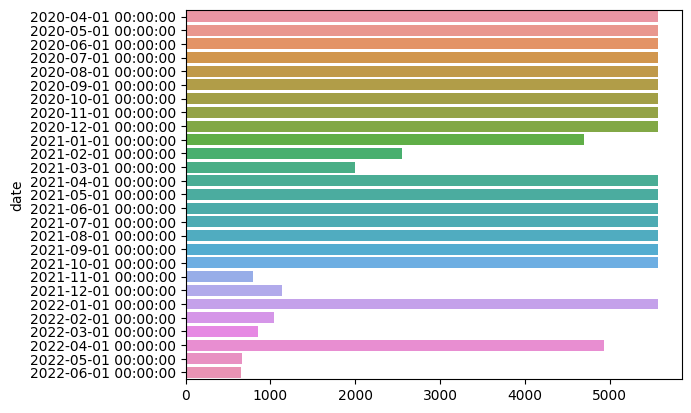

In [20]:
municipios_beneficiados_ae = auxilio_emergencial.groupby('date')['municipio_ibge'].nunique()

sns.barplot(y = municipios_beneficiados_ae.index, x=municipios_beneficiados_ae.values, orient='h')

Por que?

#### Dados faltantes e outliers

In [21]:
auxilio_emergencial.isna().sum()

municipio_ibge    2
soma              0
contagem          0
date              0
dtype: int64

In [22]:
auxilio_emergencial[auxilio_emergencial['municipio_ibge'].isna()]

,municipio_ibge,soma,contagem,date
18389,NaN,2400.0,1.0,2021-11-01
54640,NaN,11400.0,2.0,2021-03-01


<AxesSubplot: xlabel='contagem'>

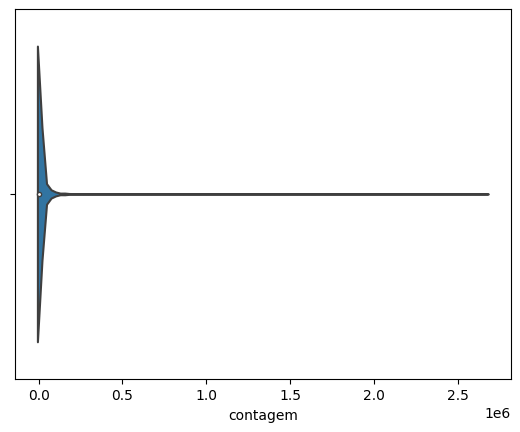

In [23]:
sns.violinplot(data=auxilio_emergencial, x='contagem')

In [24]:
contagem_max = auxilio_emergencial['contagem'].max()
contagem_min = auxilio_emergencial['contagem'].min()

print("Contagem max:", contagem_max)
print("Contagem min:", contagem_min)

Contagem max: 2675721.0
Contagem min: 1.0


In [25]:
auxilio_emergencial[auxilio_emergencial['contagem'] == contagem_max]

,municipio_ibge,soma,contagem,date
76709,3550308.0,1.868747e+09,2675721.0,2020-09-01


<AxesSubplot: xlabel='soma'>

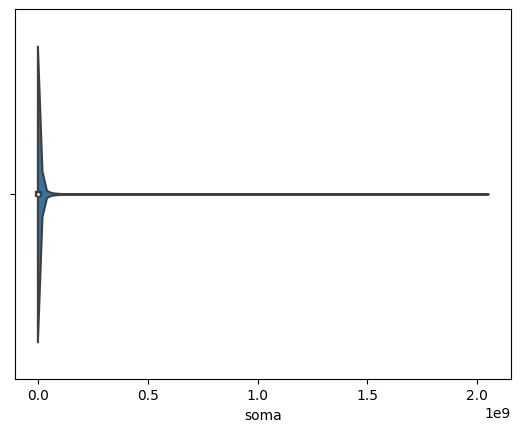

In [26]:
sns.violinplot(data=auxilio_emergencial, x='soma')

### Suicídios

In [28]:
suicidios.head()

,date,municipio_ibge,suicidios,obitos_totais,taxa_suicidio
0,2019-01-01,1100023.0,1,43,0.023256
1,2019-01-01,1100049.0,1,48,0.020833
2,2019-01-01,1100064.0,1,6,0.166667
3,2019-01-01,1100122.0,1,58,0.017241
4,2019-01-01,1100205.0,3,184,0.016304


In [31]:
n_colunas = suicidios.shape[1]
colunas = suicidios.columns

print("Colunas:", n_colunas)
print(*colunas, sep=" | ")

Colunas: 5
date | municipio_ibge | suicidios | obitos_totais | taxa_suicidio


In [34]:
n_municipios = len(suicidios['municipio_ibge'].unique())
print('Quantidade municípios:', n_municipios)

Quantidade municípios: 4234


In [36]:
start_date = suicidios['date'].min()
end_date = suicidios['date'].max()

n_meses = (end_date.to_period("M") - start_date.to_period('M')).n + 1

print("Data inicial:", start_date)
print("Data final:", end_date)
print("Quantidade meses:", n_meses)

Data inicial: 2019-01-01 00:00:00
Data final: 2020-12-01 00:00:00
Quantidade meses: 24


In [37]:
amostra_size = suicidios.shape[0]
print("Tamanho da amostra:", amostra_size)
print("Meses x Qtd. Municípios:", n_meses * n_municipios)

Tamanho da amostra: 17733
Meses x Qtd. Municípios: 101616


Nota-se, portanto, que há muitos municípios com dados faltantes. Isso é esperado já que não necessariamente há suicídios ou óbitos em todos os municípios todos os meses.

In [39]:
suicidios.isna().sum()

date              0
municipio_ibge    0
suicidios         0
obitos_totais     0
taxa_suicidio     0
dtype: int64

<AxesSubplot: xlabel='suicidios'>

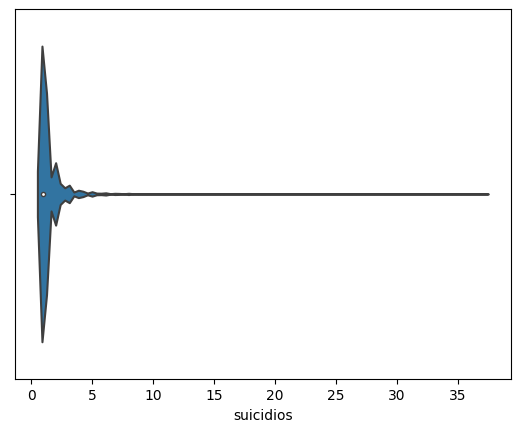

In [40]:
sns.violinplot(data=suicidios, x='suicidios')

In [41]:
suicidios.sort_values('suicidios')

,date,municipio_ibge,suicidios,obitos_totais,taxa_suicidio
0,2019-01-01,1100023.0,1,43,0.023256
15305,2020-09-01,4306304.0,1,1,1.000000
9260,2020-01-01,3503901.0,1,37,0.027027
15304,2020-09-01,4306072.0,1,1,1.000000
9262,2020-01-01,3504503.0,1,72,0.013889
...,...,...,...,...,...
10770,2020-03-01,3304557.0,33,5050,0.006535
12228,2020-05-01,3304557.0,34,9591,0.003545
17353,2020-12-01,3304557.0,35,7450,0.004698
16584,2020-11-01,3304557.0,37,5830,0.006346


<AxesSubplot: xlabel='obitos_totais'>

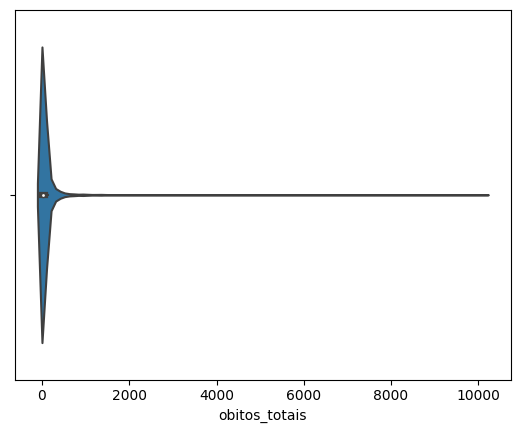

In [43]:
sns.violinplot(data=suicidios, x='obitos_totais')

<AxesSubplot: xlabel='taxa_suicidio'>

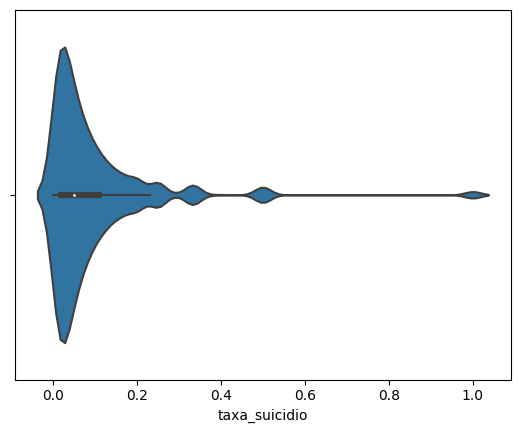

In [44]:
sns.violinplot(data=suicidios, x='taxa_suicidio')

Vamos preencher com zero a taxa de suicídio dos municípios nas datas faltantes.

In [ ]:
suicidios

### Conclusões

1. Pequena quantidade de valores faltantes em AE.
    - Solução: dropar (?), ignorar (?)
2. Qual período usar?
    - data inicio do dataset suicídios e data fim do bolsa família 